In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Numpy version: 2.3.4
Pandas version: 2.3.3
Matplotlib version 3.10.7
Seaborn version: 0.13.2


In [27]:
import math
import random

def euclidean_distance(point1, point2):
    dist = math.sqrt(
        sum(
            (p1 - p2) ** 2 for p1, p2 in zip(point1, point2)
        )
    )

    return dist

def initialize_centroids(data:list, k):
    data_list = data.tolist()

    centroids = random.sample(data_list, k)

    return centroids

def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]

    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters

def update_centroids(clusters, old_clusters):

    new_centroids = list()

    for i, cluster in enumerate(clusters):
        if cluster:
            new_centroid = [sum(dim)/len(cluster) for dim in zip(*cluster)]
        else:
            new_centroid = old_clusters[i]
        new_centroids.append(new_centroid)
    
    return new_centroids

def k_means_from_scratch(data, k, max_iterations=100):

    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):

        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters, centroids)

        centroids = new_centroids

    return centroids, clusters

In [5]:
from sklearn.datasets import make_blobs

In [6]:
X, labels = make_blobs(n_samples=500, n_features=2, centers=3, random_state=12)

In [8]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

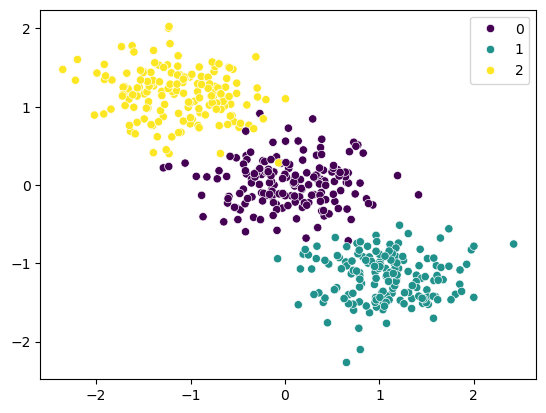

In [9]:
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis')
plt.show()

In [29]:
centroids, clusters = k_means_from_scratch(X_scaled, 3)

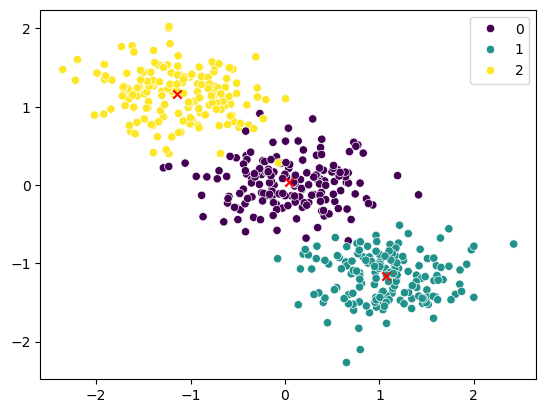

In [30]:
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis')

for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], marker='x', color='red')
plt.show()

In [31]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [32]:
kmeans.cluster_centers_

array([[ 1.07204956, -1.16237559],
       [-1.14491445,  1.15961394],
       [ 0.03945865,  0.03751371]])

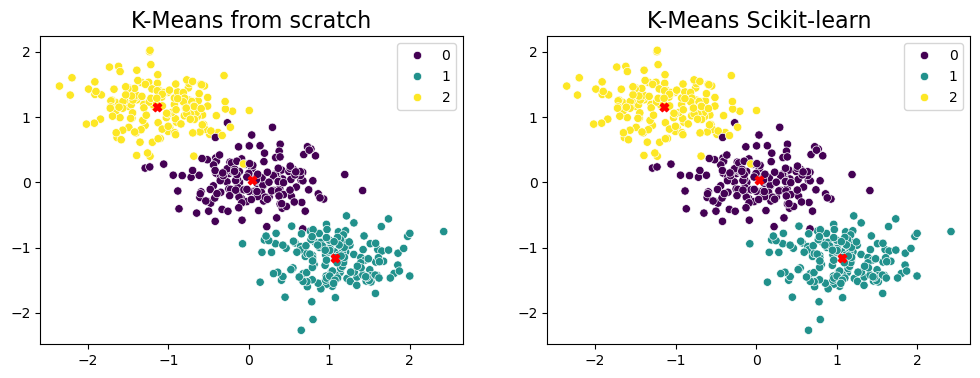

In [33]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis', ax=ax[0])
ax[0].scatter(
    [x for x, _ in centroids],
    [y for _, y in centroids],
    marker='X',
    color='red'
)
ax[0].set_title('K-Means from scratch', fontsize=16)

sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='viridis', ax=ax[1])
ax[1].scatter(
    [x for x, _ in kmeans.cluster_centers_],
    [y for _, y in kmeans.cluster_centers_],
    marker='X',
    color='red'
)
ax[1].set_title('K-Means Scikit-learn', fontsize=16)

plt.show()

In [34]:
labels_from_scratch = list()
for point in X_scaled:
    for i, cluster in enumerate(clusters):
        for point_cluster in cluster:
            if point in point_cluster:
                labels_from_scratch.append(i)
                break